# Epsilon Greedy Algorithm

The $\epsilon$-greedy algorithm is very simple and occurs in several areas of machine learning. One common use of epsilon-greedy is in the so-called multi-armed bandit problem.

Suppose you are standing in front of k machines. Each machine pays out according to a different probability distribution, and these distributions are unknown to you. And suppose you can play a total of p times. Your goal is through repeated action selected you want to maximize your outcomes by determine which machine pays you the most.

## Exploration - Exploitation TradeOff

One of the challenges that arise in these kind of problem is the trade-off between exploration to find the best machine and exploitation to maximize your outcomes.
In order to solve this we design the $\epsilon$ greedy strategy;  which chooses the bandit that we currently consider to be the best with a probability of $1 - \epsilon$, and a random bandit otherwise. Ties are broken using a random choice.

The expected reward of a bandit (i.e. the mean of the given rewards so far) is calculated using:
$$ Q_{n + 1} =\frac{1}{n} * Q_n$$

where $Q_n$ is the sum reward of action $a$ after $n - 1$ steps and where $n$ is the number of times where the action $a$ is chosed.

In [1]:
### Importing Modules ###
import numpy as np
import matplotlib.pyplot as plt
import random

In [1]:
class EpsilonGreedy:
    # k : The actions numbers.
    # epsilon : Exploration prob.
    # op_init : Optimistic initial value.
    # rewards : List of rewards for each machine.
    # k_action_values : k random number that represent the mean of each machine.
    def __init__(self, k, epsilon, op_init):
        self.k = k
        self.init = op_init
        self.epsilon = epsilon
        self.counter_played = [1]*k
        self.rewards = [op_init]*k
        self.k_action_values = np.random.normal(loc=0.0, scale= 1.0, size= k)
        self._rewards_sum = []
        
    # Select the machine with a greedy manner.
    def selected_slot(self):
        return (np.argmax([x/y for x, y in zip(self.rewards, self.counter_played)]))
    
    # Update the values of the rewards list.
    def update_rewards(self, index, k_action_values):
        true_rewards = [np.random.normal(loc=m, scale=1.0) for m in self.k_action_values]
        self.rewards[index] += true_rewards[index]
    
    def play(self):
        rand = np.random.randint(1, 100)
        if rand > self.epsilon*100:
            # Greedy selection.
            index = self.selected_slot()
            self.update_rewards(index, self.k_action_values)
            self._rewards_sum.append(sum(self.rewards))
        else:
            # Randomly selection based on the equation above.
            rand_slot = np.random.randint(0,self.k)
            self.update_rewards(rand_slot, self.k_action_values)
            self._rewards_sum.append(sum(self.rewards))
    
    def plot_rewards(self):
        plt.xlabel("Iterations")
        plt.ylabel("accumulated rewards")
        x = range(len(self._rewards_sum))
        plt.plot(x, self._rewards_sum)

# 100-armed Bandit Problem Testing With 1000 Iterations

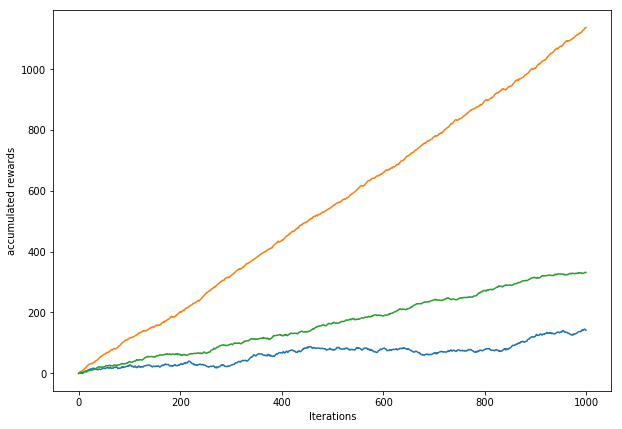

In [3]:
p0 = EpsilonGreedy(100, 1, 0)
p1 = EpsilonGreedy(100, 0.1, 0)
p2 = EpsilonGreedy(100, 0.01, 0)

for i in range(1000):
    p0.play()
    p1.play()
    p2.play()

plt.figure(figsize=(10, 7))   
p0.plot_rewards()
p1.plot_rewards()
p2.plot_rewards()
